In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('Multi_37.txt', skiprows = 29,sep='\t')
 
data.columns = ['Timestamp', 'Channel A', 'Channel B', 'Unnamed']
data_1 = data.drop('Channel B', axis=1)
data_2 = data_1.drop('Unnamed', axis=1)
data_2['Channel A'] = pd.to_numeric(data_2["Channel A"], errors='coerce')
data_3 = data_2.dropna()
import sys
np.set_printoptions(threshold=sys.maxsize)
data_3.to_numpy()

e1 = (data_3.to_numpy()[:, 0] > 65)
e2 = (data_3.to_numpy()[:, 0] < 80)
arr = data_3.to_numpy()[e1 & e2]
print(data_3.to_numpy()[e1 & e2])
#print(data_3.to_numpy())
data_list = arr.tolist()
type(data_list)

[[6.5031e+01 2.6920e-02]
 [6.5128e+01 2.7110e-02]
 [6.5192e+01 2.7180e-02]
 [6.5255e+01 2.7150e-02]
 [6.5319e+01 2.7170e-02]
 [6.5383e+01 2.7150e-02]
 [6.5447e+01 2.7150e-02]
 [6.5511e+01 2.6920e-02]
 [6.5575e+01 2.6870e-02]
 [6.5639e+01 2.7080e-02]
 [6.5703e+01 2.7000e-02]
 [6.5767e+01 2.6890e-02]
 [6.5831e+01 2.6780e-02]
 [6.5927e+01 2.6880e-02]
 [6.5991e+01 2.6900e-02]
 [6.6055e+01 2.6990e-02]
 [6.6119e+01 2.7000e-02]
 [6.6183e+01 2.6960e-02]
 [6.6247e+01 2.6960e-02]
 [6.6311e+01 2.7000e-02]
 [6.6375e+01 2.7010e-02]
 [6.6439e+01 2.6800e-02]
 [6.6503e+01 2.6650e-02]
 [6.6567e+01 2.6950e-02]
 [6.6631e+01 2.6830e-02]
 [6.6727e+01 2.6900e-02]
 [6.6791e+01 2.6890e-02]
 [6.6855e+01 2.6870e-02]
 [6.6919e+01 2.6890e-02]
 [6.6983e+01 2.7050e-02]
 [6.7047e+01 2.6870e-02]
 [6.7112e+01 2.7000e-02]
 [6.7175e+01 2.7000e-02]
 [6.7239e+01 2.7140e-02]
 [6.7303e+01 2.7110e-02]
 [6.7367e+01 2.7090e-02]
 [6.7431e+01 2.6970e-02]
 [6.7527e+01 2.6850e-02]
 [6.7591e+01 2.6920e-02]
 [6.7655e+01 2.6970e-02]


list

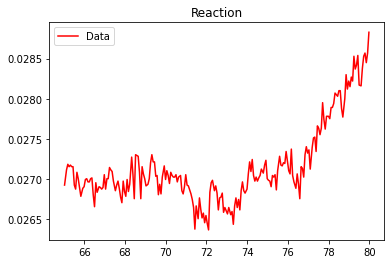

0.02883
The x-value with maximum y-value is : 8.8


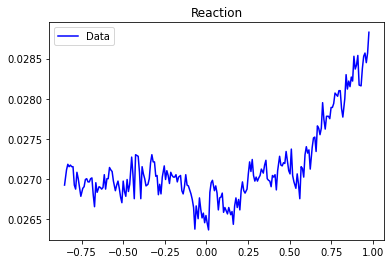

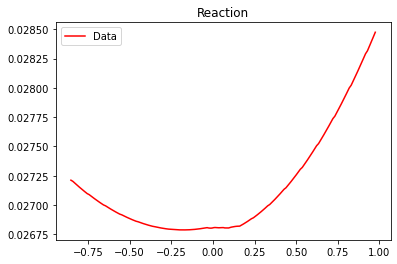

In [2]:
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
xi = arr[:,0]
x = arr[:,0]
y = arr[:,1]
yfi = savgol_filter(y, 201, 2) # window size 51, polynomial order 3

plt.plot(xi,y,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

a = max(y)
print(a)
# Python3 code to demonstrate 
# to get tuple info. of maximum value tuple
# using max() + itemgetter()
from operator import itemgetter
# using max() + itemgetter()
# to get tuple info. of maximum value tuple
toc = 9/1.1
res = 72
# printing result
print ("The x-value with maximum y-value is : " + str(res/toc))

plt.plot((x-res)/toc,y,'-b') 
#toc - time for moving translation stage by 1cm. 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

plt.plot(((x-res)/toc),yfi,'-r') 
plt.title('Reaction') 
plt.legend(['Data'], loc='upper left')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Define the function
def Open(x,c,d):
    return c*(1 - (d/(1 + x**2)))
popt, pcov = curve_fit(Open, (x-res)/toc, yfi)


In [4]:
from pylab import *
fit_c = popt[0]
fit_d = popt[1]
err_c = sqrt(pcov[0][0])
err_d = sqrt(pcov[1][1])
print("The best fit for c is: " + str(fit_c))
print("The best fit for d is: " + str(fit_d))
print("The error for c is: " + str(err_c))
print("The error for d is: " + str(err_d))

The best fit for c is: 0.029148559212051325
The best fit for d is: 0.08474550587633027
The error for c is: 9.61159340484931e-05
The error for d is: 0.0037382145638075624


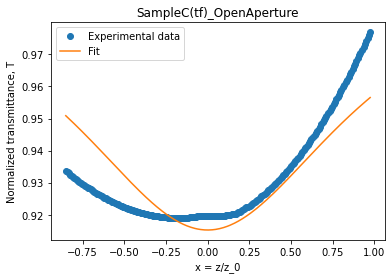

In [5]:
fit_y = Open((x-res)/toc, fit_c, fit_d)
plt.title('SampleC(tf)_OpenAperture') 
plt.xlabel('x = z/z_0')
plt.ylabel('Normalized transmittance, T')
plt.plot((x-res)/toc, yfi/fit_c, 'o', label='Experimental data')
plt.plot((x-res)/toc, fit_y/fit_c, '-', label='Fit')
plt.legend()